In [19]:
# ---------------------------------Load Odrive----------------------------------------------------

In [14]:
'''LOAD ODRIVE'''

from __future__ import print_function
import odrive
from odrive.enums import *
import time, sys
import math
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from tqdm import tnrange
import scipy.linalg
import scipy.signal

# Find a connected ODrive (this will block until you connect one)
print("finding an odrive...")
my_drive = odrive.find_any()

# Find an ODrive that is connected on the serial port /dev/ttyUSB0
#my_drive = odrive.find_any("serial:/dev/ttyUSB0")

finding an odrive...


In [ ]:
# -------------------------------------Reboot-------------------------------------------------------

In [51]:
'''REBOOT'''

my_drive.reboot()

ChannelBrokenException: 

In [ ]:
# ---------------------------------------Configurations-------------------------------------------------

In [152]:
my_drive.axis0.controller.config

control_mode = 3 (int)
pos_gain = 5.0 (float)
vel_gain = 0.0003000000142492354 (float)
vel_integrator_gain = 0.0 (float)
vel_limit = 20000.0 (float)
vel_limit_tolerance = 1.2000000476837158 (float)
vel_ramp_rate = 10000.0 (float)
setpoints_in_cpr = False (bool)

In [2]:
my_drive.axis0.motor.config

pre_calibrated = False (bool)
pole_pairs = 7 (int)
calibration_current = 8.0 (float)
resistance_calib_max_voltage = 2.0 (float)
phase_inductance = 0.0 (float)
phase_resistance = 0.0 (float)
direction = 1 (int)
motor_type = 2 (int)
current_lim = 20.0 (float)
requested_current_range = 60.0 (float)
current_control_bandwidth = 1000.0 (float)

In [113]:
my_drive.axis0.encoder.config

mode = 0 (int)
use_index = False (bool)
pre_calibrated = False (bool)
idx_search_speed = 10.0 (float)
zero_count_on_find_idx = True (bool)
cpr = 8192 (int)
offset = -4392 (int)
offset_float = -0.030671894550323486 (float)
bandwidth = 1000.0 (float)
calib_range = 0.019999999552965164 (float)

In [15]:
'''INITIALIZE THIS SETTING FIRST'''

my_drive.axis0.motor.config.pole_pairs = 11
my_drive.axis0.motor.config.motor_type = 2
my_drive.axis0.motor.config.calibration_current = 1
my_drive.axis0.motor.config.current_lim = 10

In [88]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [16]:
my_drive.axis0.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

In [196]:
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

In [13]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE

In [191]:
my_drive.axis0.controller.config.control_mode = 3

In [198]:
my_drive.axis0.controller.config.pos_gain = 16

In [197]:
my_drive.axis0.controller.config.vel_gain = 0.00003

In [ ]:
# -------------------------------------PID-------------------------------------------------------

In [25]:
dt = 0.01
c_i = 0
my_drive.axis0.controller.config.control_mode = 1
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
user_input = []

# Reference setpoint
r = 0

while True:
    
    global c_i
    
    k_p = 0.0006
    k_i = 0.0000001
    k_d = 0.0000005
    
    e = r - my_drive.axis0.encoder.pos_estimate
    c_i = c_i + e * dt
    c_d = my_drive.axis0.encoder.vel_estimate
    
    my_drive.axis0.controller.current_setpoint = k_p * e + k_i * c_i + k_d * c_d
    user_input.append(my_drive.axis0.controller.current_setpoint)
    #print(e[-1])
    #sys.stdout.write(str(my_drive.axis0.controller.current_setpoint)) 

received unexpected ACK: 8357


KeyboardInterrupt: 

Text(0,0.5,'Motor current (A)')

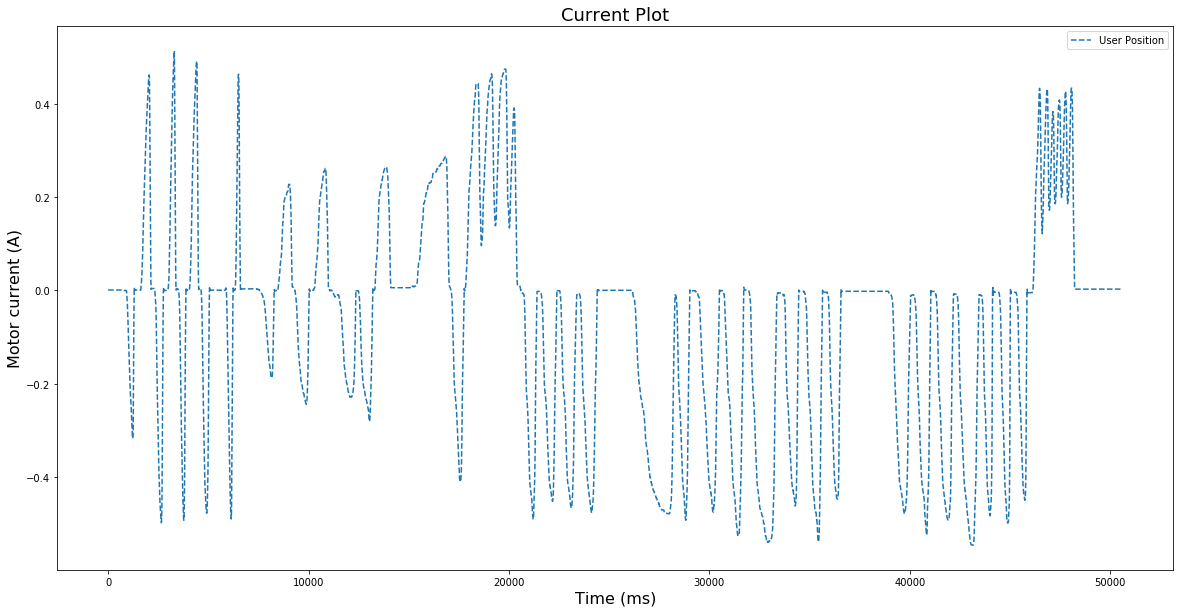

In [26]:
# Plot the parameters    
plt.figure(1, figsize=(20,10))
plt.plot(user_input, '--', label = 'User Position')
plt.legend(loc='upper right')
plt.title('Current Plot', fontsize=18)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Motor current (A)', fontsize=16)
#plt.ylim(1200,1210)    

In [ ]:
'''IGNORE EVERYTHING BELOW'''

In [ ]:
#-----------------------------PID Configuration-------------------------------

In [27]:
dt = 0.01
c_i = 0

In [ ]:
def controller(r, x):
  global c_i
  k_p = 50
  k_i = 17
  k_d = 0.01
  
  e = my_drive.axis0.controller.pos_setpoint - my_drive.axis0.encoder.pos_estimate
  c_i = c_i + e * dt
  c_d = my_drive.axis0.encoder.vel_estimate
  return k_p * e + k_i * c_i + k_d * c_d

In [103]:
c_i = 0
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL


# Reference setpoint
r = 1450

while True:
    
    global c_i
    
    k_p = 0.01
    k_i = 0.0001
    k_d = 0
    
    e = r - my_drive.axis0.encoder.pos_estimate
    c_i = c_i + e * dt
    c_d = my_drive.axis0.encoder.vel_estimate
    
    my_drive.axis0.controller.current_setpoint = k_p * e + k_i * c_i + k_d * c_d

received unexpected ACK: 21376


KeyboardInterrupt: 

In [ ]:
''' simulate the system using the discrete time approximation'''

T = 25

num = int(T/dt)+1
sigma = 0.001

t_ = np.linspace(0,T,num)
x_ = np.zeros((num, nx))
r_ = np.pi/4*np.ones((num, 1))
u_ = np.zeros((num, nu))
c_ = np.zeros(num)
w_ = np.random.randn(num, nx)
x_[0] = x0

In [ ]:
for k in range(num - 1):
  u_[k] = controller(r_[k], x_[k]) # TODO: uncomment this to turn on the controller
  x_[k+1] = f_disc(x_[k], u_[k]) + sigma*w_[k]
  # c_[k] = l(x_[k], u_[k]) # TODO: uncomment this when l is defined
  # TODO: make function def l(x,u): (like f right now) that takes in x_[k],u_[k] and outputs x_[k].T @ Q @ x_[k] + u_[k].T @ R @ u_[k]

fig, axs = plt.subplots(3, figsize=(12,8))
axs[0].plot(t_, x_, label='Closed-loop trajectory')
axs[0].plot(t_, r_, 'k--', label='Setpoint')
axs[0].grid()
axs[0].set_xlabel('time(s)')
axs[0].set_ylabel('distance(m)')
axs[0].set_xlim()
axs[0].set_ylim()
axs[0].legend()

axs[1].plot(t_, u_, label='Controller output')
axs[1].set_xlabel('time(s)')
axs[1].set_ylabel('controller output')
axs[1].legend()

axs[2].plot(t_, c_, label='Cost')
axs[2].set_xlabel('time(s)')
axs[2].set_ylabel('Cost')
axs[2].legend()

In [15]:
print(my_drive.axis0.encoder.pos_estimate)

5817.234375


In [201]:
my_drive.axis0.controller.current_setpoint = 3 #set to 4 initially

In [61]:
my_drive.axis1.controller.current_setpoint = 1

In [31]:
my_drive.axis0.controller.config.pos_gain = 1
my_drive.axis0.controller.config.vel_gain = 0.0001
my_drive.axis0.controller.config.vel_integrator_gain = 0.001

In [6]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [69]:
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [91]:
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

In [64]:
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

In [25]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE

In [63]:
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [68]:
my_drive.axis0.controller.config.control_mode = 1

In [51]:
my_drive.axis1.controller.config.control_mode = 1

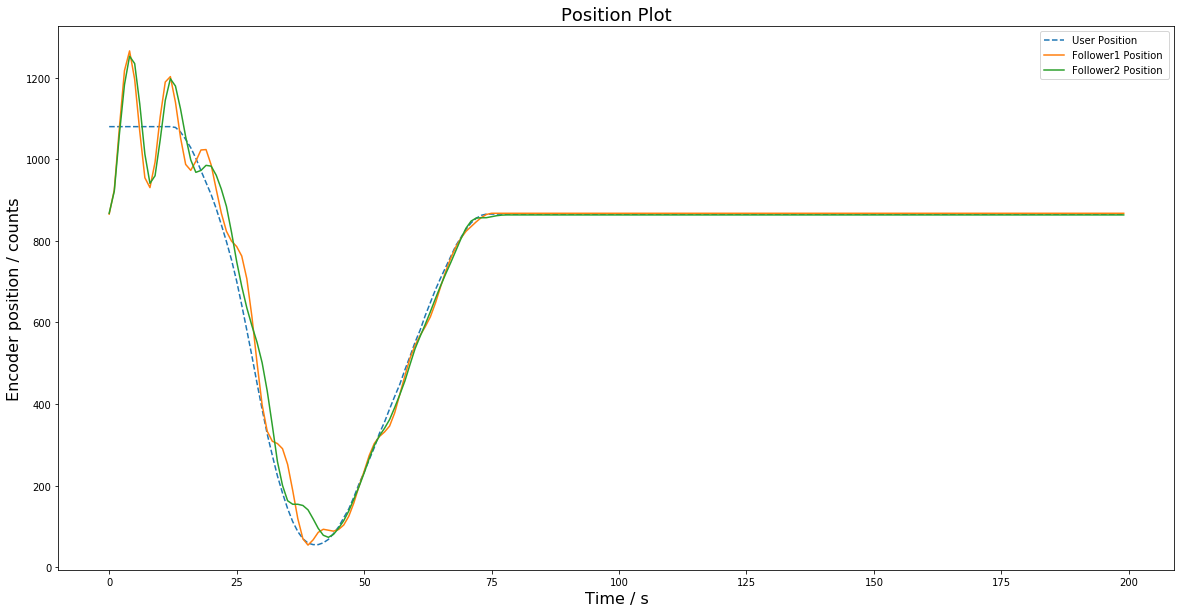

In [56]:
'''RECORD MOTION AND FOLLOW'''

trajectory_pos = [] # Create array
duration = 2 # Seconds
dt = 0.01 # Seconds
num = int(duration/dt)
c_i = 0

# Iterate duration
for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    trajectory_pos.append([pos0])
    time.sleep(dt)

    


#set_PID(200, 2.5e-4, 2.5e-4)# 650 2e-4 3e-4 or 2.5e-4
my_drive.axis0.controller.config.control_mode = 1
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Create arrays
trajectory_pos_est = []
trajectory_pos_est1 = []


# Iterate recorded trajectory positions
for point in trajectory_pos:
    global c_i
    r = point
    
    # PID
    k_p = 0.016
    k_i = 0
    k_d = 0.0000000000000000
    
    e = float(r[0]) - my_drive.axis0.encoder.pos_estimate
    c_i = c_i + e * dt
    c_d = my_drive.axis0.encoder.vel_estimate
    my_drive.axis0.controller.current_setpoint = k_p * e + k_i * c_i + k_d * c_d
    
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    trajectory_pos_est.append([pos0])
    
    time.sleep(dt)
    
for point in trajectory_pos:
    global c_i
    r = point
    
    # PID
    k_p = 0.015
    k_i = 0.000001
    k_d = 0.000015
    
    e = float(r[0]) - my_drive.axis0.encoder.pos_estimate
    c_i = c_i + e * dt
    c_d = my_drive.axis0.encoder.vel_estimate
    my_drive.axis0.controller.current_setpoint = k_p * e + k_i * c_i + k_d * c_d
    
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    trajectory_pos_est1.append([pos0])
    
    time.sleep(dt)    
    
# Plot the parameters    
plt.figure(1, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.plot(trajectory_pos_est, '-', label = 'Follower1 Position ')
plt.plot(trajectory_pos_est1, '-', label = 'Follower2 Position ')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)
#plt.ylim(1200,1210)


# Stop closed-loop control
my_drive.axis0.requested_state = AXIS_STATE_IDLE

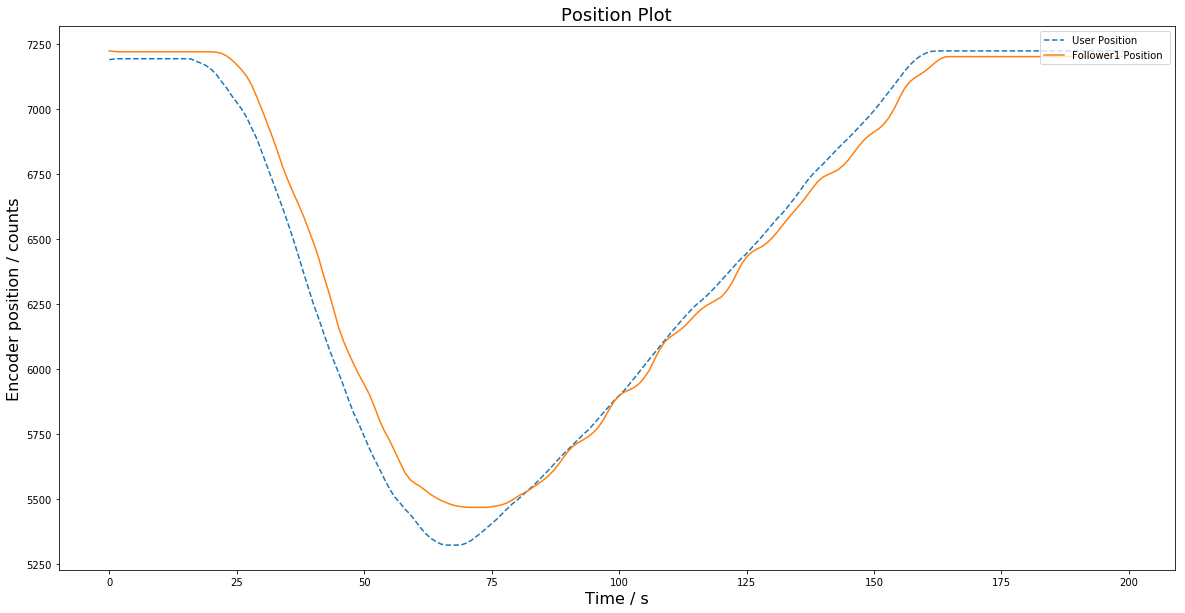

In [94]:
'''RECORD MOTION AND FOLLOW'''

trajectory_pos = [] # Create array
duration = 2 # Seconds
dt = 0.01 # Seconds
num = int(duration/dt)
c_i0 = 0
c_i1 = 0

# Iterate duration
for _ in range(num):
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos.append([pos1])
    time.sleep(dt)
    

my_drive.axis1.controller.config.control_mode = 1
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Create arrays
trajectory_pos_est = []

# Iterate recorded trajectory positions
for point in trajectory_pos:
    global c_i0, c_i1
    r = point
    
    # PID
    k_p = 0.019
    k_i = 0.000001
    k_d = 0.000015
    
    e = float(r[0]) - my_drive.axis1.encoder.pos_estimate
    c_i1 = c_i + e * dt
    c_d1 = my_drive.axis1.encoder.vel_estimate
    my_drive.axis1.controller.current_setpoint = k_p * e + k_i * c_i1+ k_d * c_d1
    
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos_est.append([pos1])
    
    time.sleep(dt)    
    
# Plot the parameters    
plt.figure(1, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.plot(trajectory_pos_est, '-', label = 'Follower1 Position ')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)
#plt.ylim(1200,1210)


# Stop closed-loop control
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

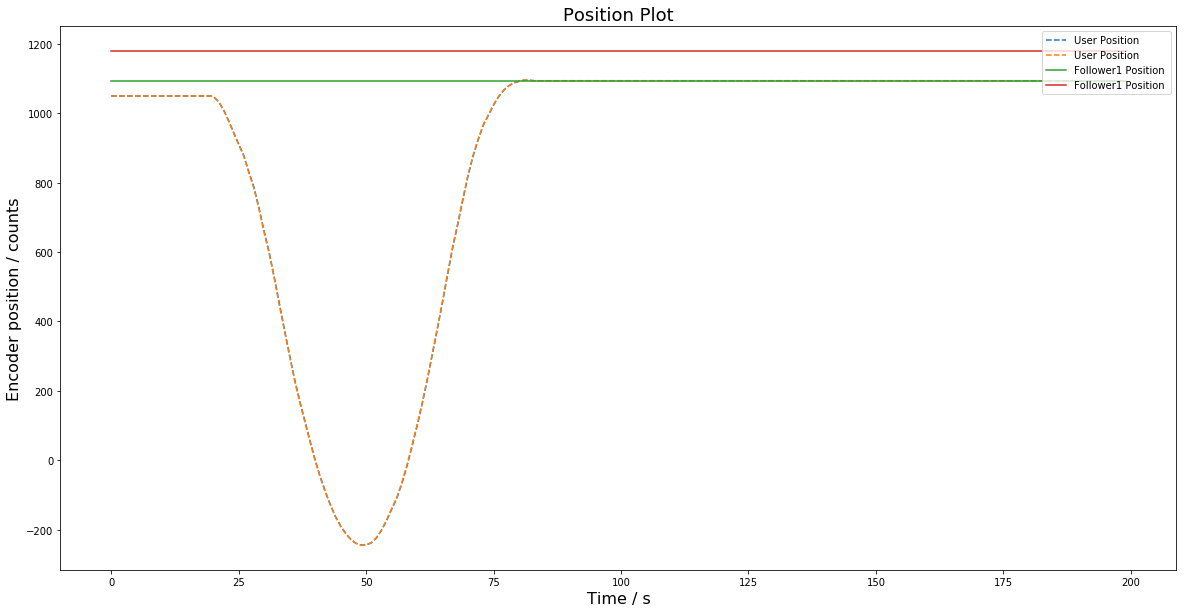

In [44]:
'''RECORD MOTION AND FOLLOW 2'''

trajectory_pos = [] # Create array
duration = 2 # Seconds
dt = 0.01 # Seconds
num = int(duration/dt)
c_i = 0

# Iterate duration
for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis0.encoder.pos_estimate
    trajectory_pos.append([pos0, pos1])
    time.sleep(dt)

    


#set_PID(200, 2.5e-4, 2.5e-4)# 650 2e-4 3e-4 or 2.5e-4
my_drive.axis0.controller.config.control_mode = 1
my_drive.axis1.controller.config.control_mode = 1
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Create arrays
trajectory_pos_est = []


# Iterate recorded trajectory positions    
for point in trajectory_pos:
    global c_i
    r = point
    
    # PID
    k_p = 0.015
    k_i = 0.000001
    k_d = 0.000015
    
    e0 = float(r[0]) - my_drive.axis0.encoder.pos_estimate
    c_i = c_i + e0 * dt
    c_d = my_drive.axis0.encoder.vel_estimate
    my_drive.axis0.controller.current_setpoint = k_p * e + k_i * c_i + k_d * c_d
    

    
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos_est.append([pos0, pos1])
    
    time.sleep(dt)    
    
# Plot the parameters    
plt.figure(1, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.plot(trajectory_pos_est, '-', label = 'Follower1 Position ')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)
#plt.ylim(1200,1210)


# Stop closed-loop control
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

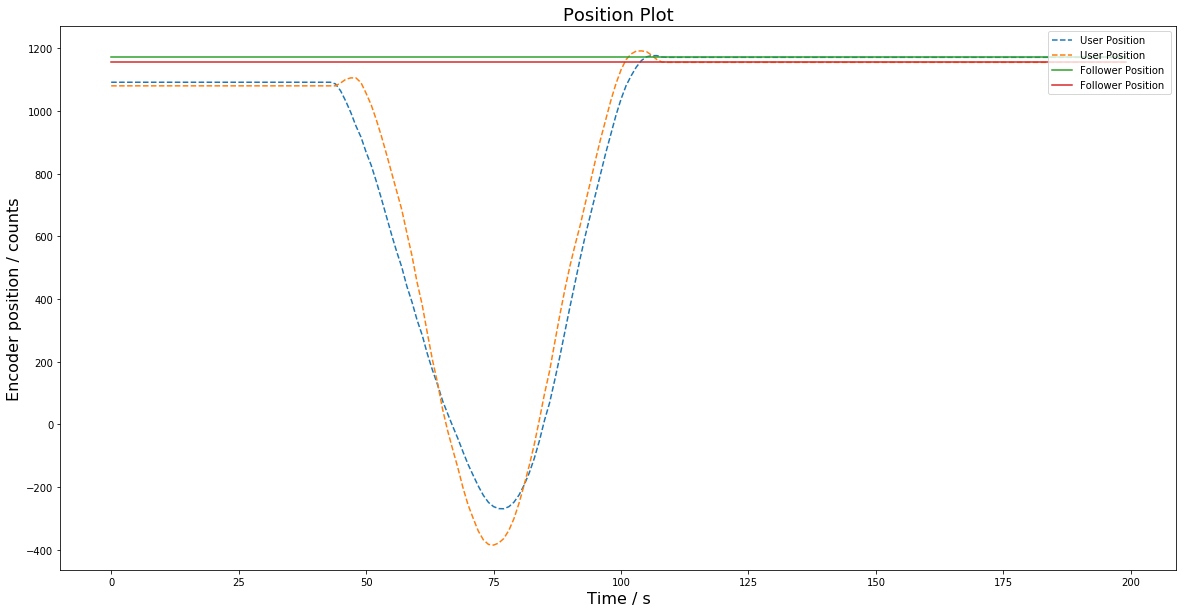

In [41]:
'''RECORD MOTION AND FOLLOW'''

trajectory_pos = [] # Create array
duration = 2 # Seconds
dt = 0.01 # Seconds
num = int(duration/dt)
c_i = 0

# Iterate duration
for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos.append([pos0, pos1])
    time.sleep(dt)

my_drive.axis0.controller.config.control_mode = 1
my_drive.axis1.controller.config.control_mode = 1
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Create arrays
trajectory_pos_est = []


# Iterate recorded trajectory positions
for point in trajectory_pos:
    global c_i
    r = point
    
    # PID
    k_p = 0.015
    k_i = 0.000001
    k_d = 0.000015
    
    e0 = float(r[0]) - my_drive.axis0.encoder.pos_estimate
    c_i = c_i + e0 * dt
    c_d = my_drive.axis0.encoder.vel_estimate
    my_drive.axis0.controller.current_setpoint = k_p * e + k_i * c_i + k_d * c_d
    
    e1 = float(r[1]) - my_drive.axis1.encoder.pos_estimate
    c_i = c_i + e1 * dt
    c_d = my_drive.axis1.encoder.vel_estimate
    my_drive.axis1.controller.current_setpoint = k_p * e + k_i * c_i + k_d * c_d
    
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos_est.append([pos0, pos1])
    
    time.sleep(dt)   
        
    
# Plot the parameters    
plt.figure(2, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.plot(trajectory_pos_est, '-', label = 'Follower Position ')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)


# Stop closed-loop control
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [7]:
set0

NameError: name 'set0' is not defined

In [113]:
l1 = [1,2,3,4,5]
l2 = [float(i) for i in l1]
print(l2)

[1.0, 2.0, 3.0, 4.0, 5.0]


In [117]:
float(r[0])

1497.75048828125

In [ ]:
# ---------------------------------Function Definitions----------------------------------------------

In [219]:
'''SET PID FUNCTION'''

def set_PID(pos_gain, vel_gain, vel_integrator_gain):
    # Motor 0
    my_drive.axis0.controller.config.pos_gain = pos_gain
    my_drive.axis0.controller.config.vel_gain = vel_gain
    my_drive.axis0.controller.config.vel_integrator_gain = vel_integrator_gain
    
    # Motor 1
    my_drive.axis1.controller.config.pos_gain = pos_gain
    my_drive.axis1.controller.config.vel_gain = vel_gain
    my_drive.axis1.controller.config.vel_integrator_gain = vel_integrator_gain

In [220]:
'''SET MOTOR 0 ANGLE'''

# 1320 makes axis0 at zero position
# -690 makes axis0 at theta1 90 degrees, counter clockwise
# 3380 makes axis0 at theta1-90 degrees, clockwise
def set_axis0_angle(x):
    if x > 110 or x < -110:
        print("INVALID ANGLE, DEGREES CAN ONLY BE -110 to 110")
    elif x == 0:
        my_drive.axis0.controller.pos_setpoint = 1320 # limit at 102
    elif x > 0:
        setpoint = x/90*-2010+1320  
        my_drive.axis0.controller.pos_setpoint = setpoint
    elif x < 0:   
        setpoint = -x/90*2060+1320  
        my_drive.axis0.controller.pos_setpoint = setpoint
    else:
        setpoint = 1

In [221]:
'''SET MOTOR 1 ANGLE'''

# 1020 makes axis1 at zero position
# -1020 makes axis1 at theta2 at 90, clockwise
# 3055 makes axis 1 at theta2 at -90 degrees, counter clockwise
def set_axis1_angle(x):
    if x > 110 or x < -110:
        print("INVALID ANGLE, DEGREES CAN ONLY BE -110 to 110")
    elif x == 0:
        my_drive.axis1.controller.pos_setpoint = 1020
    elif x > 0:
        setpoint = x/90*-2040+1020  
        my_drive.axis1.controller.pos_setpoint = setpoint
        
    elif x < 0:   
        setpoint = -x/90*2035+1020  
        my_drive.axis1.controller.pos_setpoint = setpoint
        
    else:
        setpoint = 1

In [222]:
'''CHECK IF POS0 AND POS1 IS IN ARRAY'''

def check_in_array(pos0, pos1, array):
    flag = 0
    for i in range(len(array)):
        if array[i] == [pos0, pos1]: # If equal, do a flag
            flag = 1
    
    #return based on flag
    if flag == 1:
        return True
    else:
        return False

In [223]:
'''FIND CLOSEST VALUE OF POS0 AND POS1 ON ARRAY'''

def find_closest(pos0, pos1, array):
    point = [10000, 10000] # Set initial to very large distance first
    
    for i in range(len(array)): # Iterate for length of array
    
        # Calculate closest position
        if ((pos0 - array[i][0])**2 +(pos1 - array[i][1] )**2)**(1/2) < ((pos0 - point[0])**2 +(pos1 - point[1])**2)**(1/2):
            point = [array[i][0],array[i][1]]
            
    return point

In [57]:
# ---------------------------------Configuration Values----------------------------------------------

In [2]:
'''MOTOR 0 CONFIGURATION'''

my_drive.axis0.controller.config, my_drive.axis0.motor.config, my_drive.axis0.encoder.config

(control_mode = 3 (int)
 pos_gain = 5.0 (float)
 vel_gain = 0.0003000000142492354 (float)
 vel_integrator_gain = 0.0 (float)
 vel_limit = 20000.0 (float)
 vel_limit_tolerance = 1.2000000476837158 (float)
 vel_ramp_rate = 10000.0 (float)
 setpoints_in_cpr = False (bool), pre_calibrated = False (bool)
 pole_pairs = 7 (int)
 calibration_current = 8.0 (float)
 resistance_calib_max_voltage = 2.0 (float)
 phase_inductance = 0.0 (float)
 phase_resistance = 0.0 (float)
 direction = 1 (int)
 motor_type = 2 (int)
 current_lim = 20.0 (float)
 requested_current_range = 60.0 (float)
 current_control_bandwidth = 1000.0 (float), mode = 0 (int)
 use_index = False (bool)
 pre_calibrated = False (bool)
 idx_search_speed = 10.0 (float)
 zero_count_on_find_idx = True (bool)
 cpr = 8192 (int)
 offset = -4392 (int)
 offset_float = -0.030671894550323486 (float)
 bandwidth = 1000.0 (float)
 calib_range = 0.019999999552965164 (float))

In [3]:
'''MOTOR 1 CONFIGURATION'''

my_drive.axis1.controller.config, my_drive.axis1.motor.config, my_drive.axis1.encoder.config

(control_mode = 3 (int)
 pos_gain = 5.0 (float)
 vel_gain = 0.0003000000142492354 (float)
 vel_integrator_gain = 0.0 (float)
 vel_limit = 20000.0 (float)
 vel_limit_tolerance = 1.2000000476837158 (float)
 vel_ramp_rate = 10000.0 (float)
 setpoints_in_cpr = False (bool), pre_calibrated = False (bool)
 pole_pairs = 7 (int)
 calibration_current = 8.0 (float)
 resistance_calib_max_voltage = 2.0 (float)
 phase_inductance = 0.0 (float)
 phase_resistance = 0.0 (float)
 direction = -1 (int)
 motor_type = 2 (int)
 current_lim = 20.0 (float)
 requested_current_range = 60.0 (float)
 current_control_bandwidth = 1000.0 (float), mode = 0 (int)
 use_index = False (bool)
 pre_calibrated = False (bool)
 idx_search_speed = 10.0 (float)
 zero_count_on_find_idx = True (bool)
 cpr = 8192 (int)
 offset = -4338 (int)
 offset_float = 0.16240623593330383 (float)
 bandwidth = 1000.0 (float)
 calib_range = 0.019999999552965164 (float))

In [110]:
my_drive.axis1.motor.config.direction = 1

In [3]:
my_drive.vbus_voltage

24.18603515625

In [44]:
'''MOTOR SETUP'''

# Motor 0
my_drive.axis0.motor.config.calibration_current = 8.0
my_drive.axis0.motor.config.current_lim = 20.0
my_drive.axis0.motor.config.motor_type = 2

# Motor 1
my_drive.axis1.motor.config.calibration_current = 8.0
my_drive.axis1.motor.config.current_lim = 10
my_drive.axis1.motor.config.motor_type = 2

In [81]:
# ---------------------------------Calibration modes----------------------------------------------------

In [69]:
'''SET CALIBRATION INDEX SEARCH SPEED'''

my_drive.axis0.encoder.config.idx_search_speed = 3
my_drive.axis1.encoder.config.idx_search_speed = 3

In [13]:
'''SIMULTANEOUS INDEX SEARCH CALIBRATION OF BOTH MOTORS'''

my_drive.axis0.encoder.config.idx_search_speed = 3
my_drive.axis1.encoder.config.idx_search_speed = 3

my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [116]:
my_drive.axis0.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

AttributeError: 'RemoteObject' object has no attribute 'axis0'

In [117]:
my_drive.axis1.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

AttributeError: 'RemoteObject' object has no attribute 'axis1'

In [2]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [54]:
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [101]:
# ---------------------------------Closed Loop Control-------------------------------------------------

In [10]:
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

In [159]:
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

In [6]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE

In [233]:
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [49]:
'''SET BOTH MOTORS TO HAVE POSITION CONTROL'''

my_drive.axis0.controller.config.control_mode = 3
my_drive.axis1.controller.config.control_mode = 3

In [117]:
# 1320 makes axis0 at zero position, with pos_gain 60
# -690 makes axis0 at theta1 90 degrees, pos_gain 60, counter clockwise
# 3380, -90 degrees, clockwise
my_drive.axis0.controller.pos_setpoint = -40
print("Position setpoint is " + str(my_drive.axis0.controller.pos_setpoint))
print("Angle setpoint is " + str((my_drive.axis0.controller.pos_setpoint+40)/-1900*90))

Position setpoint is -40.0
Angle setpoint is -0.0


In [163]:
# 1020 makes axis1 at zero position, with gain 60
# -1020 makes axis1 at theta2 at 90, with gain 60, clockwise
# 3055, -90 degrees, counter clockwise
my_drive.axis1.controller.pos_setpoint = -1000
print("Position setpoint is " + str(my_drive.axis1.controller.pos_setpoint))
print("Angle setpoint is " + str((my_drive.axis1.controller.pos_setpoint-28165)/-1920*90))

Position setpoint is -1000.0
Angle setpoint is 1367.109375


In [142]:
set_axis1_angle(-90)

In [234]:
'''DISPLAY MOTOR POSITION'''

while(1):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    sys.stdout.write("\r\rcpr0: " + str(pos0) + " cpr1:" + str(pos1)) 
    time.sleep(0.1)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

cpr0: 1087.234619140625 cpr1:773.7506103515625

KeyboardInterrupt: 

In [ ]:
# ---------------------------------Motion Experiments----------------------------------------------------

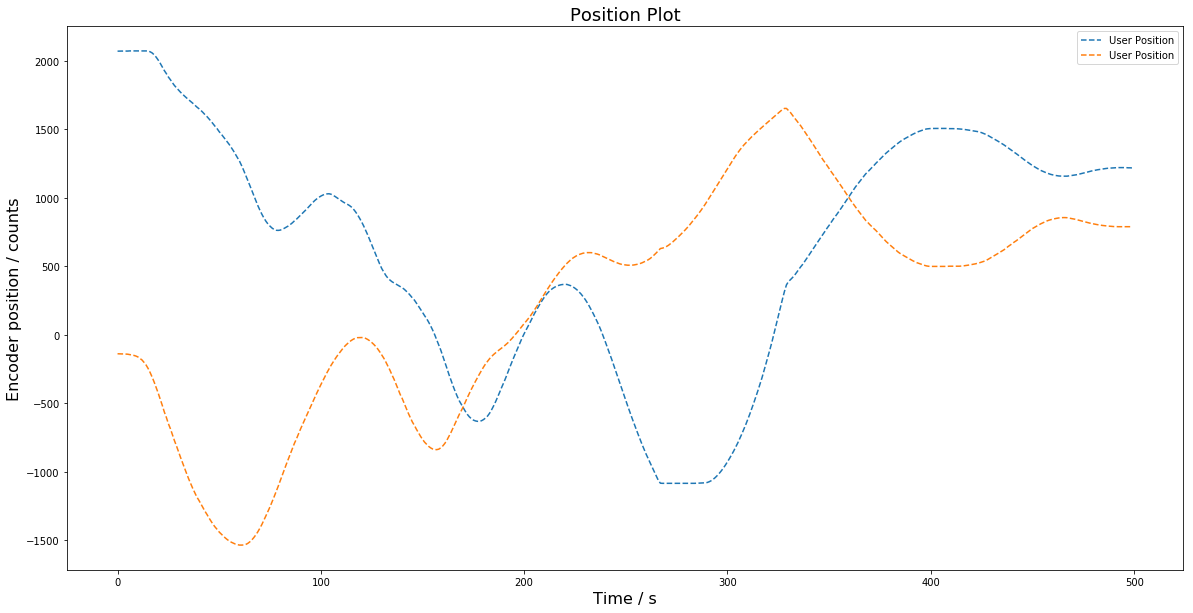

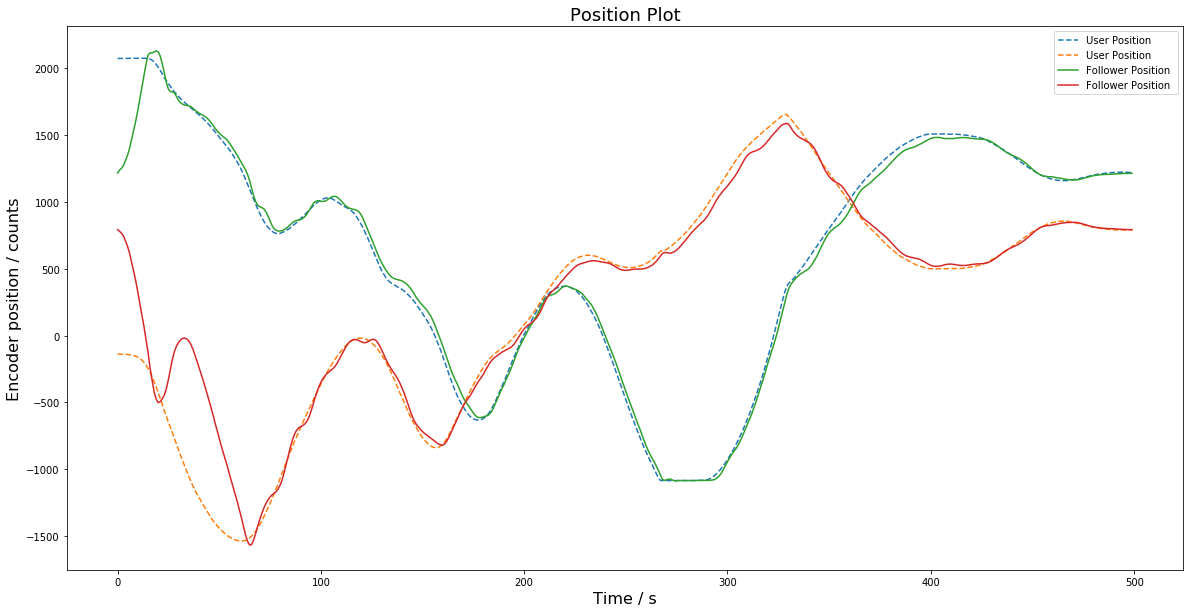

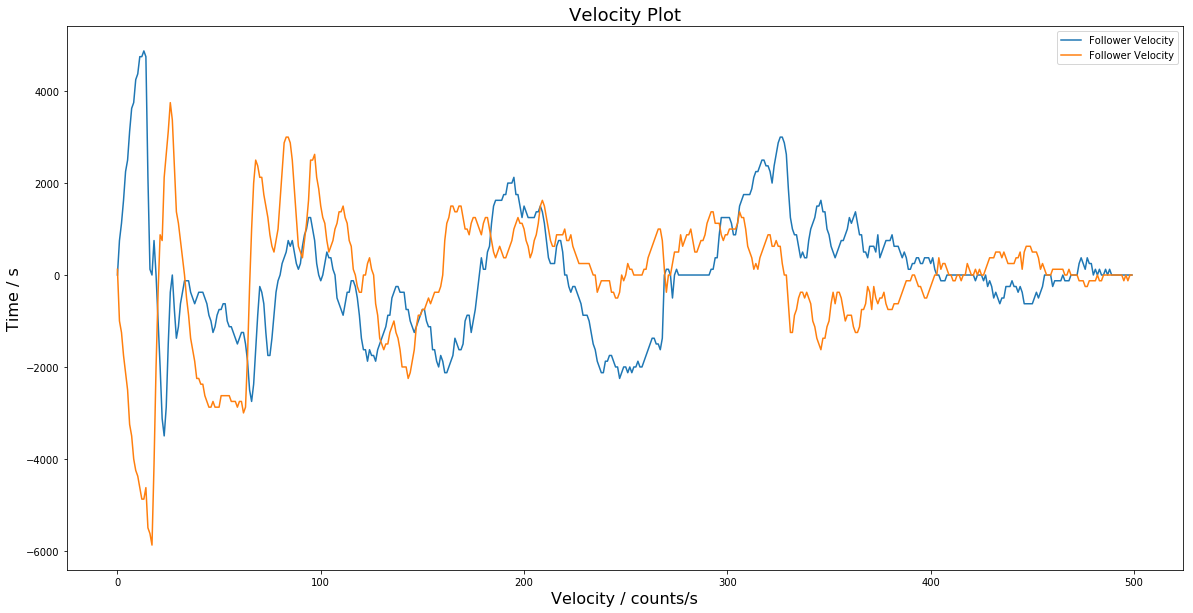

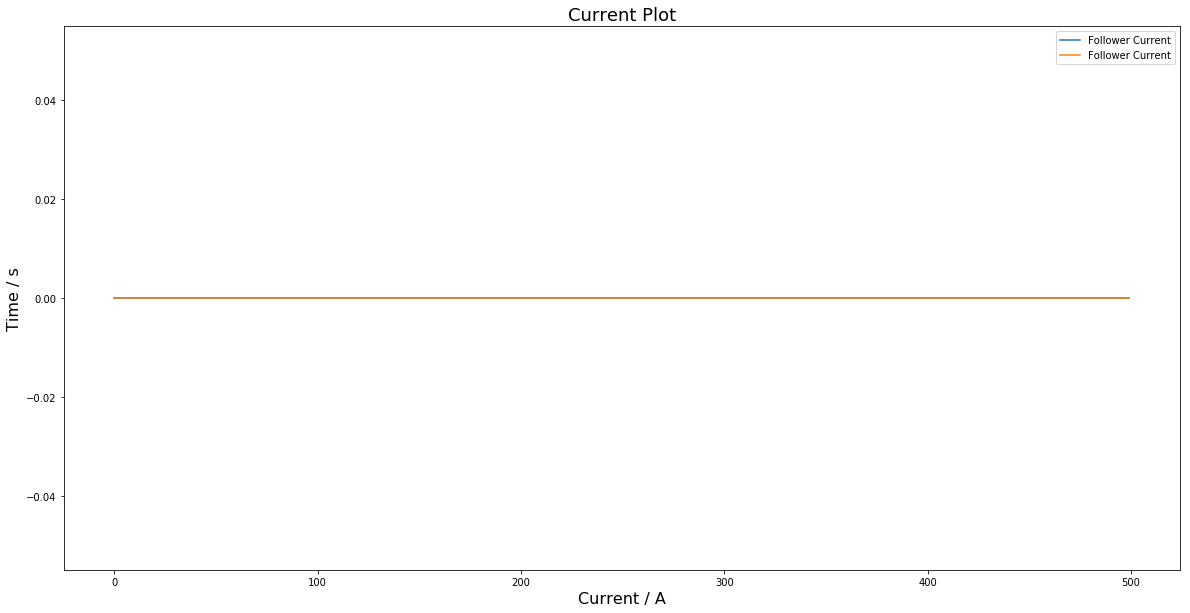

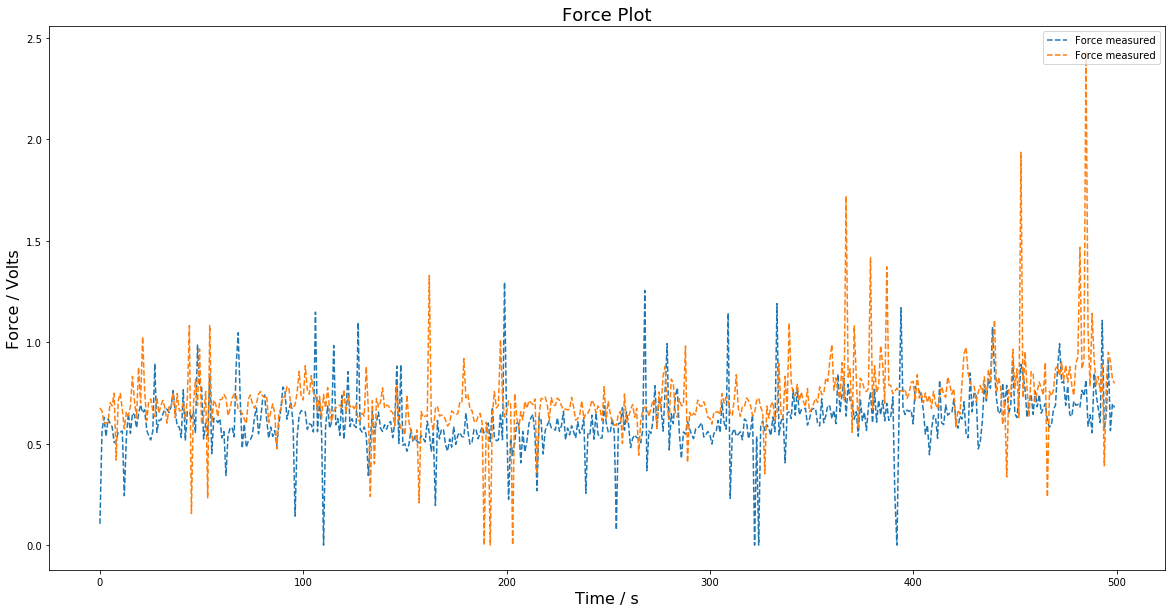

In [293]:
'''RECORD MOTION AND FOLLOW'''

trajectory_pos = [] # Create array
duration = 5 # Seconds
dt = 0.01 # Seconds
num = int(duration/dt)

# Iterate duration
for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos.append([pos0, pos1])
    time.sleep(dt)

# Plot motion
plt.figure(1, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)

set_PID(200, 2.5e-4, 2.5e-4)# 650 2e-4 3e-4 or 2.5e-4
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Create arrays
trajectory_pos_est = []
trajectory_vel_est = []
trajectory_cur_est = []
force_est = []

# Iterate recorded trajectory positions
for point in trajectory_pos:
    
    set0, set1 = point
    my_drive.axis0.controller.pos_setpoint = set0
    my_drive.axis1.controller.pos_setpoint = set1
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos_est.append([pos0, pos1])
        
    vel0 = my_drive.axis0.encoder.vel_estimate
    vel1 = my_drive.axis1.encoder.vel_estimate
    trajectory_vel_est.append([vel0, vel1])
    
    cur0 = my_drive.axis0.motor.current_control.Iq_measured
    cur1 = my_drive.axis1.motor.current_control.Iq_measured
    trajectory_cur_est.append([cur0, cur1])
    
    force0 = my_drive.get_adc_voltage(4)
    force1 = my_drive.get_adc_voltage(5)
    force_est.append([force0, force1])
    
    time.sleep(dt)
    
    
# Plot the parameters    
plt.figure(2, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.plot(trajectory_pos_est, '-', label = 'Follower Position ')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)

plt.figure(3, figsize=(20,10))
plt.plot(trajectory_vel_est, '-', label = 'Follower Velocity')
plt.legend(loc='upper right')
plt.title('Velocity Plot', fontsize=18)
plt.xlabel('Velocity / counts/s', fontsize=16)
plt.ylabel('Time / s', fontsize=16)

plt.figure(4, figsize=(20,10))
plt.plot(trajectory_cur_est, '-', label = 'Follower Current')
plt.legend(loc='upper right')
plt.title('Current Plot', fontsize=18)
plt.xlabel('Current / A', fontsize=16)
plt.ylabel('Time / s', fontsize=16)

plt.figure(5, figsize=(20,10))
plt.plot(force_est, '--', label = 'Force measured')
plt.legend(loc='upper right')
plt.title('Force Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Force / Volts', fontsize=16)

# Stop closed-loop control
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [303]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

force0: 0.024169921875 force1:0.06525878608226776

ChannelBrokenException: 

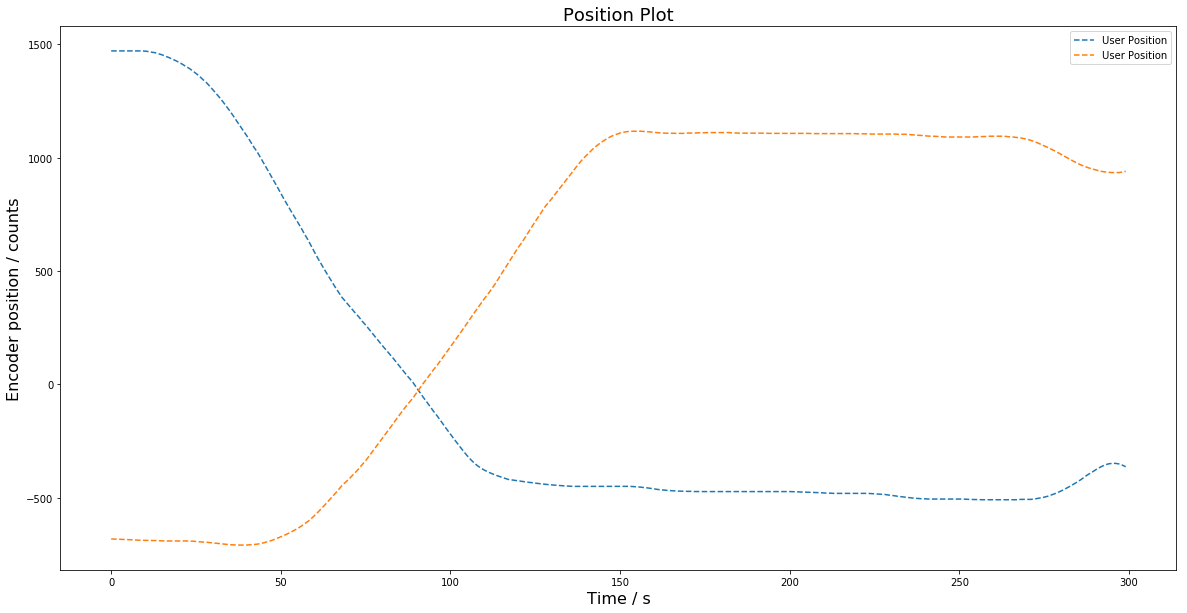

In [304]:
'''RECORD MOTION AND STAY IN REGION'''

trajectory_pos = [] # Create array
duration = 3 # Seconds
dt = 0.01 # Seconds
num = int(duration/dt)

# Iterate duration
for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos.append([pos0, pos1])
    time.sleep(dt)

# Plot motion
plt.figure(1, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)

set_PID(100, 4.5e-4, 0)# 650 2e-4 3e-4, 100, 4.5e-4, 0

my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Iterate infinitely
while True:
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    
    # Check current position is in array
    if check_in_array(pos0, pos1, trajectory_pos) == False:
        
        # Find closest point in array from current location
        set0, set1 = find_closest(pos0, pos1, trajectory_pos)
        
        # Move position to the region
        my_drive.axis0.controller.pos_setpoint = set0
        my_drive.axis1.controller.pos_setpoint = set1
        
        force0 = my_drive.get_adc_voltage(4)
        force1 = my_drive.get_adc_voltage(5)
        sys.stdout.write("\r\rforce0: " + str(force0) + " force1:" + str(force1)) # Print
        time.sleep(0.1)

In [239]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [30]:
'''DISPLAY MOTOR POSITION'''

while(1):
    # Record position and print
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    sys.stdout.write("\r\rcpr0: " + str(pos0) + " cpr1:" + str(pos1)) 
    time.sleep(0.1)

cpr0: 1293.234619140625 cpr1:798.9996337890625	 vel_setpoint0.0

KeyboardInterrupt: 

Text(0,0.5,'Encoder position / counts')

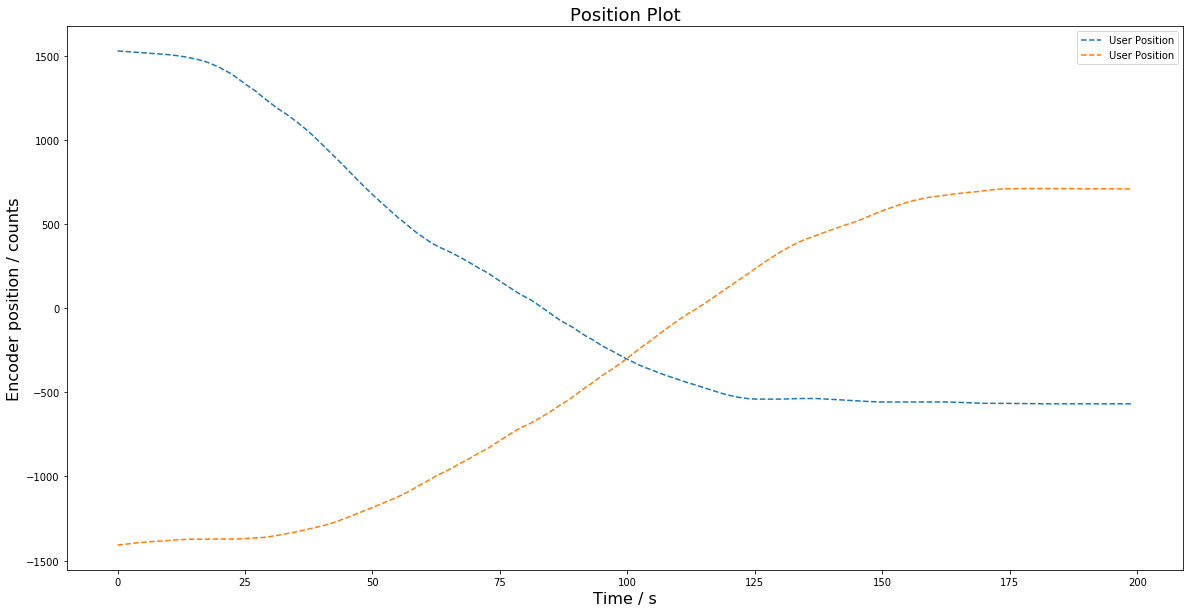

In [124]:
'''RECORD MOTION'''

trajectory_pos = [] # Create array
duration = 2 # Seconds
dt = 0.01 # Seconds
num = int(duration/dt)

# Iterate duration
for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos.append([pos0, pos1])
    time.sleep(dt)

# Plot motion
plt.figure(1, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)

In [126]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [125]:
'''STAY IN RECORDED REGION'''

set_PID(650, 2e-4, 3e-4)# 650 2e-4 3e-4, 100, 4.5e-4, 0

#my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Iterate infinitely
while True:
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    
    # Check current position is in array
    if check_in_array(pos0, pos1, trajectory_pos) == False:
        
        # Find closest point in array from current location
        set0, set1 = find_closest(pos0, pos1, trajectory_pos)
        
        # Move position to the region
        my_drive.axis0.controller.pos_setpoint = set0
        my_drive.axis1.controller.pos_setpoint = set1
        
        force0 = my_drive.get_adc_voltage(4)
        force1 = my_drive.get_adc_voltage(5)
        sys.stdout.write("\r\rforce0: " + str(force0) + " force1:" + str(force1)) # Print
        time.sleep(0.1)

force0: 0.4052490293979645 force1:0.3520751893520355

KeyboardInterrupt: 

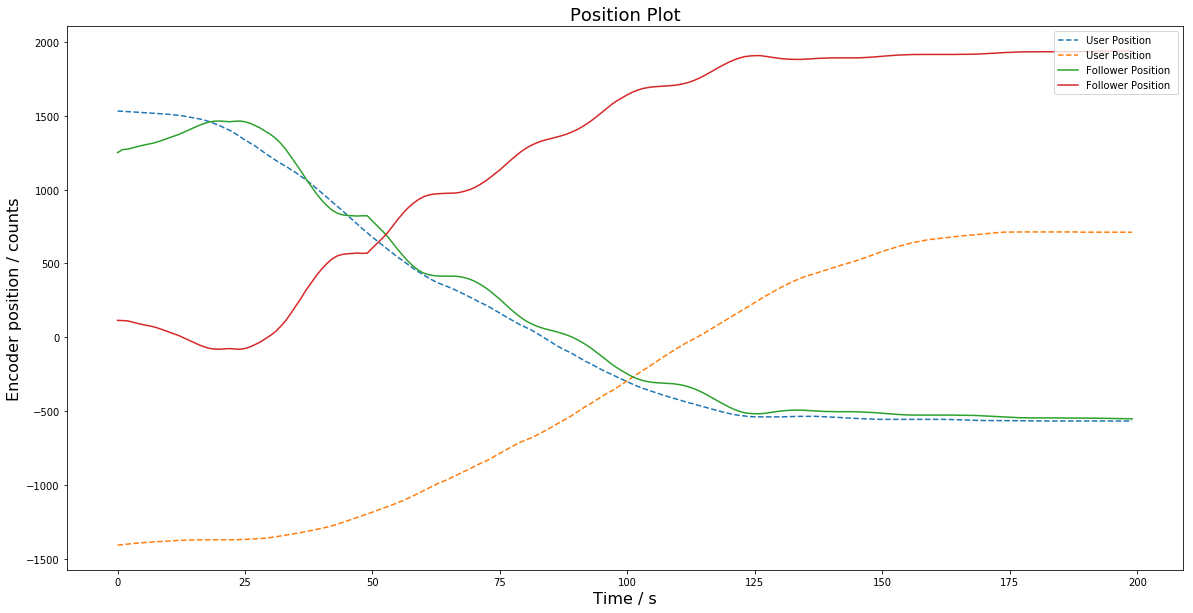

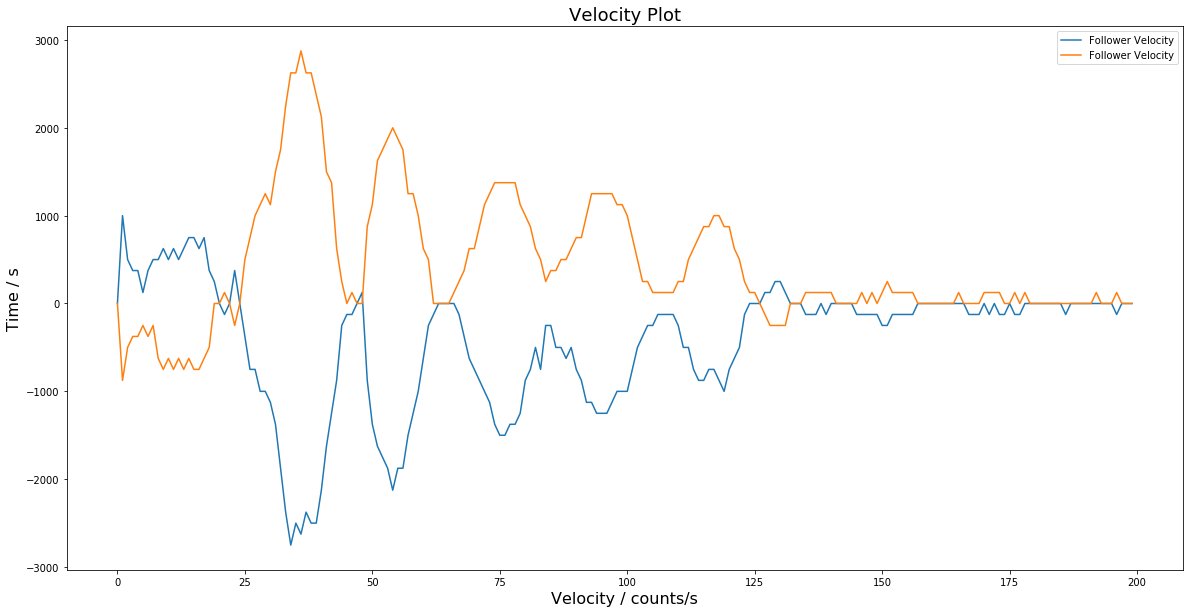

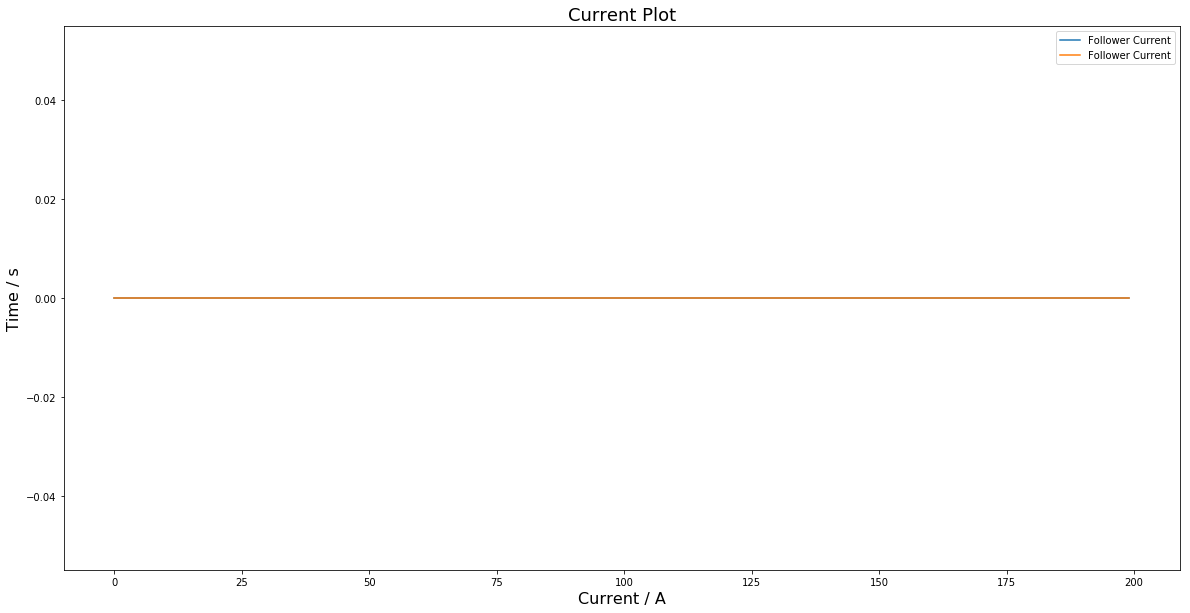

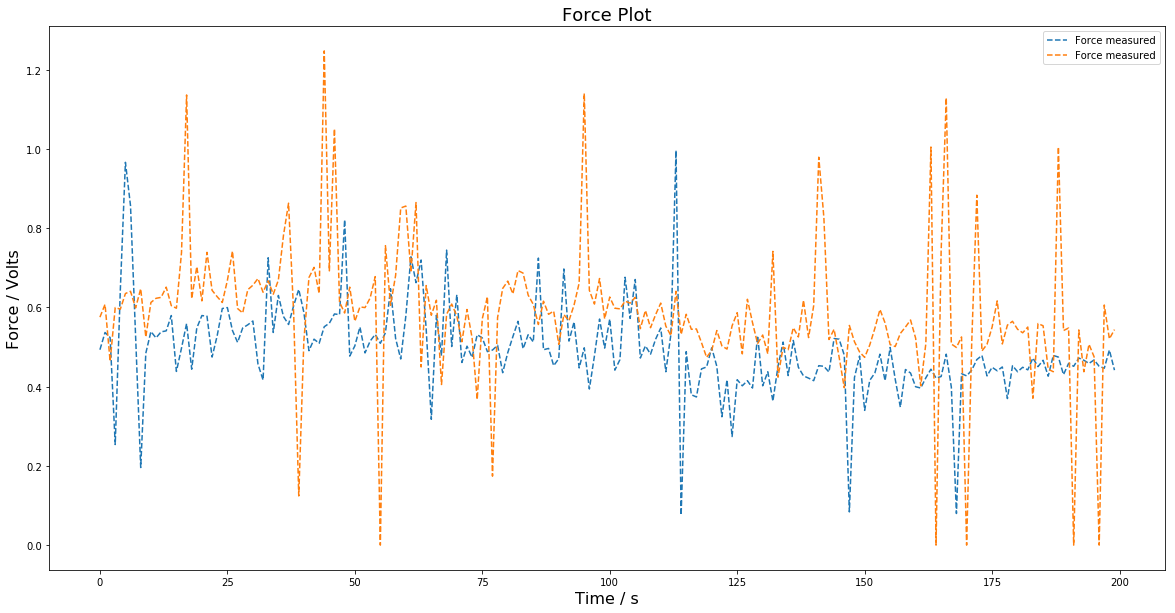

In [127]:
'''FOLLOW THE RECORDED MOTION'''

set_PID(200, 2.5e-4, 2.5e-4)# 650 2e-4 3e-4 or 2.5e-4
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Create arrays
trajectory_pos_est = []
trajectory_vel_est = []
trajectory_cur_est = []
force_est = []

# Iterate recorded trajectory positions
for point in trajectory_pos:
    
    set0, set1 = point
    my_drive.axis0.controller.pos_setpoint = set0
    my_drive.axis1.controller.pos_setpoint = set1
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_pos_est.append([pos0, pos1])
        
    vel0 = my_drive.axis0.encoder.vel_estimate
    vel1 = my_drive.axis1.encoder.vel_estimate
    trajectory_vel_est.append([vel0, vel1])
    
    cur0 = my_drive.axis0.motor.current_control.Iq_measured
    cur1 = my_drive.axis1.motor.current_control.Iq_measured
    trajectory_cur_est.append([cur0, cur1])
    
    force0 = my_drive.get_adc_voltage(4)
    force1 = my_drive.get_adc_voltage(5)
    force_est.append([force0, force1])
    
    time.sleep(dt)
    
    
# Plot the parameters    
plt.figure(1, figsize=(20,10))
plt.plot(trajectory_pos, '--', label = 'User Position')
plt.plot(trajectory_pos_est, '-', label = 'Follower Position ')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)

plt.figure(2, figsize=(20,10))
plt.plot(trajectory_vel_est, '-', label = 'Follower Velocity')
plt.legend(loc='upper right')
plt.title('Velocity Plot', fontsize=18)
plt.xlabel('Velocity / counts/s', fontsize=16)
plt.ylabel('Time / s', fontsize=16)

plt.figure(3, figsize=(20,10))
plt.plot(trajectory_cur_est, '-', label = 'Follower Current')
plt.legend(loc='upper right')
plt.title('Current Plot', fontsize=18)
plt.xlabel('Current / A', fontsize=16)
plt.ylabel('Time / s', fontsize=16)

plt.figure(4, figsize=(20,10))
plt.plot(force_est, '--', label = 'Force measured')
plt.legend(loc='upper right')
plt.title('Force Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Force / Volts', fontsize=16)

# Stop closed-loop control
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

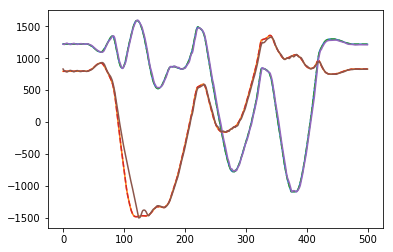

In [23]:
'''RECORD AND FOLLOW'''

trajectory = []
duration = 5 # seconds
dt = 0.01 # seconds
num = int(duration/dt)

for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate

    trajectory.append([pos0, pos1])
    time.sleep(dt)
    
plt.plot(trajectory)

time.sleep(2)

set_PID(600, 3e-4, 2.5e-4)

trajectory_est = []
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

for point in trajectory:
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_est.append([pos0, pos1])
    
    set0, set1 = point
    my_drive.axis0.controller.pos_setpoint = set0
    my_drive.axis1.controller.pos_setpoint = set1
    
    time.sleep(dt)
    
#for point in reversed(trajectory):
#    pos0 = my_drive.axis0.encoder.pos_estimate
#    pos1 = my_drive.axis1.encoder.pos_estimate
#    trajectory_est.append([pos0, pos1])
   
#    set0, set1 = point
#    my_drive.axis0.controller.pos_setpoint = set0
#    my_drive.axis1.controller.pos_setpoint = set1
    
#    time.sleep(dt)
    
plt.plot(trajectory, '--')
plt.plot(trajectory_est)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [ ]:
'''SIMPLE MOTIONS'''

duration = 10 # seconds
dt = 0.01 # seconds
num = int(duration/dt)

my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

set_PID(8, 0.0006, 0.0)

# A sine wave to test
t0 = time.monotonic()
time.sleep(1.7)
t1 = time.monotonic()

for _ in range(num):
    
    setpoint = 1000.0 * math.sin((time.monotonic() - t0)*3)
    setpoint1 = 1000.0 * math.sin((time.monotonic() - t1)*3)
    # print("goto " + str(int(setpoint)))

    # go up and down trajectory
    my_drive.axis0.controller.pos_setpoint = setpoint-1000
    my_drive.axis1.controller.pos_setpoint = (setpoint-1000)

    # make circle
    #my_drive.axis0.controller.pos_setpoint = setpoint-1500
    #my_drive.axis1.controller.pos_setpoint = (setpoint1-1500)
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate

    trajectory.append([pos0, pos1])
    time.sleep(dt)
    
plt.plot(trajectory)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [ ]:
# -------------------------------Force Sensor Experiments-----------------------------------------------

In [101]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [ ]:
'''PRINT ENCODER ANGLE'''

while(1):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    angle0 = (pos0 - 1320) / -2010 * 90
    angle1 = (pos1 - 1020) / -2040 * 90
    sys.stdout.write("\r\rangle0: " + str(angle0) + " angle1:" + str(angle1)) # Print
    time.sleep(0.1)

In [115]:
'''FORCE MAPPING'''

set_PID(200, 2.5e-4, 2.5e-4)
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

# Create array
force_mapping = []

# Iterate Motor1 angle from 105 to -105 degrees
for i in range(105, -105, -1):
    
    set_axis1_angle(i)

    # Iterate Motor0 angle
    for j in range(-(i-15), -(i-160), 1):
        if j > 105:
            break
        set_axis0_angle(j)
        if j == -(i-15):
            time.sleep(3)    
        time.sleep(.7)
        
        # Record and save position and force
        pos0 = my_drive.axis0.encoder.pos_estimate
        pos1 = my_drive.axis1.encoder.pos_estimate
        force0 = my_drive.get_adc_voltage(4)
        force1 = my_drive.get_adc_voltage(5)
        force_mapping.append([pos0, pos1, force0, force1])

# Redefine array        
force_mapping = np.array(force_mapping)     

# Plot motor position and force measured
plt.figure(1, figsize=(20,10))
plt.plot(force_mapping[:, [0, 1]], '--', label = 'Motor Position')
plt.legend(loc='upper right')
plt.title('Position Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Encoder position / counts', fontsize=16)

plt.figure(2, figsize=(20,10))
plt.plot(force_mapping[:, [2, 3]], '--', label = 'Force Measured')
plt.legend(loc='upper right')
plt.title('Force Plot', fontsize=18)
plt.xlabel('Time / s', fontsize=16)
plt.ylabel('Force / Voltage', fontsize=16)

# Display array
force_mapping
force_mapping[:, [2, 3]]

KeyboardInterrupt: 

In [ ]:
# ---------------------------------Index Saving Setup---------------------------------------------------

In [ ]:
# With this configuration, we only need to do this after each reboot:
# my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [19]:
my_drive.axis0.encoder.config.use_index = True

In [20]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [21]:
my_drive.axis0.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

In [22]:
my_drive.axis0.encoder.config.pre_calibrated = True

In [23]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [24]:
my_drive.axis0.motor.config.pre_calibrated = True

In [25]:
my_drive.save_configuration()

In [29]:
my_drive.axis1.encoder.config.use_index = True

In [31]:
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [32]:
my_drive.axis1.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

In [33]:
my_drive.axis1.encoder.config.pre_calibrated = True

In [34]:
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [35]:
my_drive.axis1.motor.config.pre_calibrated = True

In [7]:
my_drive.save_configuration()

In [71]:
# ---------------------------------Testings-----------------------------------------------------------

In [184]:
my_drive.axis1.encoder.pos_estimate

2.999999761581421

In [185]:
my_drive.axis1.encoder.vel_estimate

0.0

In [68]:
my_drive.axis0.motor.current_control.Iq_measured

0.0

In [ ]:
# ---------------------------------Configurations------------------------------------------------------

In [18]:
'''MOTOR AND ENCODER CONFIGURATIONS'''

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLEmy_drive.axis0.motor.config.pre_calibrated = False 
my_drive.axis0.motor.config.pole_pairs = 7 
my_drive.axis0.motor.config.calibration_current = 8.0 
my_drive.axis0.motor.config.resistance_calib_max_voltage = 2.0 
my_drive.axis0.motor.config.phase_inductance = 0.0
my_drive.axis0.motor.config.phase_resistance = 0.0 
my_drive.axis0.motor.config.direction = -1 
my_drive.axis0.motor.config.motor_type = 2 
my_drive.axis0.motor.config.current_lim = 20.0 
my_drive.axis0.motor.config.requested_current_range = 60.0 
my_drive.axis0.encoder.config.mode = 0 
my_drive.axis0.encoder.config.use_index = False
my_drive.axis0.encoder.config.pre_calibrated = False
my_drive.axis0.encoder.config.idx_search_speed = 10.0 
my_drive.axis0.encoder.config.cpr = 8192
my_drive.axis0.encoder.config.offset = -4392 
my_drive.axis0.encoder.config.offset_float = -0.030671894550323486 
my_drive.axis0.encoder.config.calib_range = 0.019999999552965164

my_drive.axis1.motor.config.pre_calibrated = False 
my_drive.axis1.motor.config.pole_pairs = 7 
my_drive.axis1.motor.config.calibration_current = 8.0 
my_drive.axis1.motor.config.resistance_calib_max_voltage = 2.0 
my_drive.axis1.motor.config.phase_inductance = 0.0
my_drive.axis1.motor.config.phase_resistance = 0.0 
my_drive.axis1.motor.config.direction = -1 
my_drive.axis1.motor.config.motor_type = 2 
my_drive.axis1.motor.config.current_lim = 20.0 
my_drive.axis1.motor.config.requested_current_range = 60.0 
my_drive.axis1.encoder.config.mode = 0 
my_drive.axis1.encoder.config.use_index = False
my_drive.axis1.encoder.config.pre_calibrated = False
my_drive.axis1.encoder.config.idx_search_speed = 10.0 
my_drive.axis1.encoder.config.cpr = 8192
my_drive.axis1.encoder.config.offset = -4392 
my_drive.axis1.encoder.config.offset_float = -0.030671894550323486 
my_drive.axis1.encoder.config.calib_range = 0.019999999552965164

In [ ]:
'''PID CONFIGURATIONS'''   
    # Default control
    my_drive.axis0.controller.config.vel_integrator_gain = 0.0010000000474974513
    my_drive.axis0.controller.config.vel_gain = 0.0005000000237487257
    my_drive.axis0.controller.config.pos_gain = 20.0

    # Spring-like control
    my_drive.axis0.controller.config.vel_integrator_gain = 0
    my_drive.axis0.controller.config.vel_gain = 0.0003
    my_drive.axis0.controller.config.pos_gain = 5

    # Testing out control
    my_drive.axis0.controller.config.vel_integrator_gain = 0
    my_drive.axis0.controller.config.vel_gain = 0.00035
    my_drive.axis0.controller.config.pos_gain = 6

In [ ]:
# ----------------------------------Other features-----------------------------------------------------

In [223]:
# To read a value, simply read the property
print("Bus voltage is " + str(my_drive.vbus_voltage) + "V")

# Or to change a value, just assign to the property
my_drive.axis0.controller.pos_setpoint = 3.14
print("Position setpoint is " + str(my_drive.axis0.controller.pos_setpoint))

Bus voltage is 24.201343536376953V
Position setpoint is 3.140000104904175


In [68]:
# And this is how function calls are done:
for i in [1,2,3,4,5,6,7,8]:
    print('voltage on GPIO{} is {} Volt'.format(i, my_drive.get_adc_voltage(i)))

voltage on GPIO1 is 0.8080810308456421 Volt
voltage on GPIO2 is 0.6751464605331421 Volt
voltage on GPIO3 is 0.724291980266571 Volt
voltage on GPIO4 is 0.7750487923622131 Volt
voltage on GPIO5 is 1.9384276866912842 Volt
voltage on GPIO6 is 0.8113036751747131 Volt
voltage on GPIO7 is 0.814526379108429 Volt
voltage on GPIO8 is 0.8193603157997131 Volt


In [39]:
while(1):
    force0 = my_drive.get_adc_voltage(4)
    force1 = my_drive.get_adc_voltage(5)
    sys.stdout.write("\r\rforce0: " + str(force0) + " force1:" + str(force1)) 
    time.sleep(0.1)

force0: 1.7998534440994263 force1:1.5992431640625

KeyboardInterrupt: 

In [67]:
my_drive.GPIO_set_to_analog(my_drive.get_gpio_port_by_pin(1), 1);

AttributeError: 'RemoteObject' object has no attribute 'GPIO_set_to_analog'

In [49]:
my_drive.get_adc_voltage(1)

0.813720703125

In [43]:
my_drive.get_gpio_port_by_pin(1)

AttributeError: 'RemoteObject' object has no attribute 'get_gpio_port_by_pin'

In [206]:
# A sine wave to test
t0 = time.monotonic()
time.sleep(1.7)
t1 = time.monotonic()

while True:
    # prev 10000.0
    setpoint = 1000.0 * math.sin((time.monotonic() - t0)*3)
    setpoint1 = 1000.0 * math.sin((time.monotonic() - t1)*3)
#     print("goto " + str(int(setpoint)))

    # go up and down trajectory
    #my_drive.axis0.controller.pos_setpoint = setpoint-1000
    #my_drive.axis1.controller.pos_setpoint = (setpoint-1000)

    # make circle
    my_drive.axis0.controller.pos_setpoint = setpoint-1500
    my_drive.axis1.controller.pos_setpoint = (setpoint1-1500)
    
    
    time.sleep(0.001)

# Some more things you can try:

KeyboardInterrupt: 

In [152]:
# Write to a read-only property:
my_drive.vbus_voltage = 11.0  # fails with `AttributeError: can't set attribute`

# Assign an incompatible value:
my_drive.motor0.pos_setpoint = "I like trains"  # fails with `ValueError: could not convert string to float`

AttributeError: Attribute vbus_voltage not found

In [ ]:
import sys
sys.version